# Image Classification Of 5 people.


Dataset:

2 people datasets are collected personally for this project.

3 people images are downloaded from web.

Totaly it contains 211 images each of which is approximately (40 to 45 images)

Expected Outcome: To classify the people image with greater accuracy.

In [1]:
# importing modules for basic operations 
import numpy as np
# importing modules for data  plotting and visualizations.
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
# installing opencv to plot image dataset 
! pip install opencv-python

In [3]:
import cv2

In [4]:
# reading a single image to visualise
img = cv2.imread("model\Test data\Saba test 4.jpg")
img.shape

(1280, 720, 3)

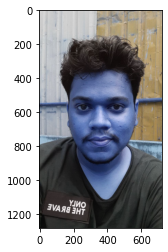

In [5]:
# plotting the image
plt.imshow(img)


In [6]:
# converting to gray colured image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1280, 720)

In [7]:
gray

array([[207, 209, 210, ..., 133, 131, 130],
       [207, 209, 210, ..., 136, 141, 144],
       [207, 209, 210, ..., 145, 150, 154],
       ...,
       [ 96,  92,  84, ...,  63,  59,  58],
       [ 99,  94,  86, ...,  66,  59,  65],
       [101,  95,  86, ...,  67,  61,  74]], dtype=uint8)

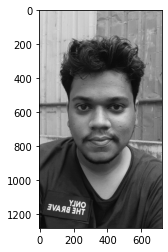

In [8]:
plt.imshow(gray, cmap='gray')

In [9]:
# XMl Files to detect front face and eyes 
# xml source: from github.
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") #Note the change
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

In [10]:
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3,minNeighbors=5)
faces


array([[113, 381, 488, 488]])

In [11]:
(x,y,w,h) = faces[0]
x,y,w,h

(113, 381, 488, 488)

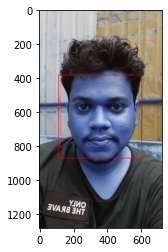

In [12]:
# detecting face with rechange red colored shape 
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

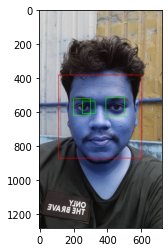

In [13]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

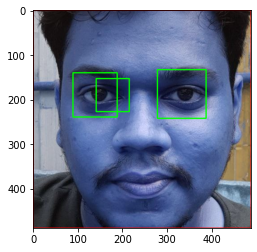

In [14]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [15]:
cropped_img = np.array(roi_color)
cropped_img.shape

(488, 488, 3)

In [16]:
import pywt
  
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

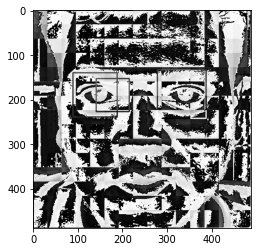

In [17]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [18]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    #im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    #data = cv2.imread('path_to_your_image', as_grey =True)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

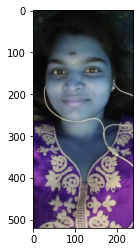

In [19]:
original_image = cv2.imread("model\Test data\st1.jpg")
plt.imshow(original_image)

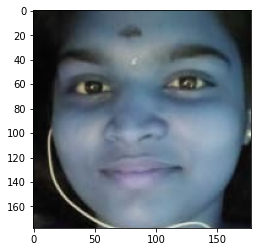

In [20]:
cropped_image = get_cropped_image_if_2_eyes("model\Test data\st1.jpg")
plt.imshow(cropped_image)
plt.imshow(cropped_image)

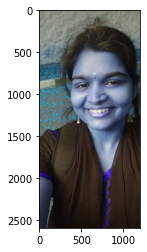

In [21]:
org_image_obstructed = cv2.imread("model\Test data\suji test 2.jpg")
plt.imshow(org_image_obstructed)


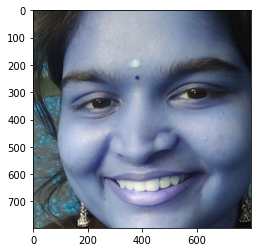

In [22]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes("model\Test data\suji test 2.jpg")
plt.imshow(cropped_image_no_2_eyes)


In [23]:
cropped_image_no_2_eyes

array([[[ 70,  77,  72],
        [ 70,  77,  70],
        [ 71,  77,  72],
        ...,
        [ 23,  20,  16],
        [ 26,  23,  19],
        [ 26,  23,  19]],

       [[ 75,  82,  75],
        [ 72,  79,  72],
        [ 63,  69,  64],
        ...,
        [ 23,  20,  16],
        [ 23,  20,  16],
        [ 22,  19,  15]],

       [[ 83,  91,  84],
        [ 75,  83,  76],
        [ 70,  76,  71],
        ...,
        [ 24,  21,  17],
        [ 24,  21,  17],
        [ 22,  19,  15]],

       ...,

       [[112, 117, 108],
        [103, 108,  99],
        [ 98, 105,  98],
        ...,
        [ 22,  20,  19],
        [ 18,  16,  15],
        [ 13,  11,  10]],

       [[111, 116, 107],
        [103, 108,  99],
        [105, 112, 105],
        ...,
        [ 25,  23,  22],
        [ 22,  20,  19],
        [ 14,  12,  11]],

       [[103, 108,  99],
        [ 98, 103,  94],
        [104, 108, 102],
        ...,
        [ 23,  19,  18],
        [ 23,  19,  18],
        [ 18,  14,  13]]

In [24]:
path_to_data = "./model/dataset/"
path_to_cr_data = "./model/dataset/AAAAAA/"

In [25]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [26]:
img_dirs

['./model/dataset/.ipynb_checkpoints',
 './model/dataset/AAAAAA',
 './model/dataset/Ankur Warikoo',
 './model/dataset/Obama',
 './model/dataset/Sabarish',
 './model/dataset/Suji',
 './model/dataset/Surya']

In [27]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [28]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    print(img_dir)
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        print(entry)
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

./model/dataset/.ipynb_checkpoints
./model/dataset/AAAAAA
./model/dataset/Ankur Warikoo
<DirEntry 'Ankur warikoo (1).jpg'>
Generating cropped images in folder:  ./model/dataset/AAAAAA/Ankur Warikoo
<DirEntry 'Ankur Warikoo (2).jpg'>
<DirEntry 'Ankur warikoo (3).jpg'>
<DirEntry 'Ankur Warikoo (Entrepreneur) Height (1).jpg'>
<DirEntry 'Ankur Warikoo (Entrepreneur) Height.jpg'>
<DirEntry 'Ankur Warikoo - Cofounder and Board.jpg'>
<DirEntry 'Ankur Warikoo - Harappa.jpg'>
<DirEntry 'Ankur Warikoo - India (72 books).jpg'>
<DirEntry 'Ankur Warikoo - The Financial Pandora.jpg'>
<DirEntry 'Ankur Warikoo 2022 LIVE Tour _ 10.jpg'>
<DirEntry 'Ankur Warikoo Age_ Wife_ Children (1).jpg'>
<DirEntry 'Ankur Warikoo Age_ Wife_ Children.jpg'>
<DirEntry 'Ankur Warikoo Biography - Nearbuy.jpg'>
<DirEntry 'Ankur Warikoo Biography_ Age.jpg'>
<DirEntry 'Ankur warikoo Biography_ age_ height.jpg'>
<DirEntry 'Ankur Warikoo Biography_ Education (1).jpg'>
<DirEntry 'Ankur Warikoo Biography_ Education.jpg'>
<DirEnt

In [29]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
#class_dict = {'Ankur Warikoo': 0, 'Obama': 1, 'Sabarish': 2, 'Suji': 3, 'Surya': 4}
class_dict

{'.ipynb_checkpoints': 0,
 'AAAAAA': 1,
 'Ankur Warikoo': 2,
 'Obama': 3,
 'Sabarish': 4,
 'Suji': 5,
 'Surya': 6}

In [30]:
celebrity_file_names_dict

{'.ipynb_checkpoints': [],
 'AAAAAA': [],
 'Ankur Warikoo': ['./model/dataset/AAAAAA/Ankur Warikoo/Ankur Warikoo1.png',
  './model/dataset/AAAAAA/Ankur Warikoo/Ankur Warikoo2.png',
  './model/dataset/AAAAAA/Ankur Warikoo/Ankur Warikoo3.png',
  './model/dataset/AAAAAA/Ankur Warikoo/Ankur Warikoo4.png',
  './model/dataset/AAAAAA/Ankur Warikoo/Ankur Warikoo5.png',
  './model/dataset/AAAAAA/Ankur Warikoo/Ankur Warikoo6.png',
  './model/dataset/AAAAAA/Ankur Warikoo/Ankur Warikoo7.png',
  './model/dataset/AAAAAA/Ankur Warikoo/Ankur Warikoo8.png',
  './model/dataset/AAAAAA/Ankur Warikoo/Ankur Warikoo9.png',
  './model/dataset/AAAAAA/Ankur Warikoo/Ankur Warikoo10.png',
  './model/dataset/AAAAAA/Ankur Warikoo/Ankur Warikoo11.png',
  './model/dataset/AAAAAA/Ankur Warikoo/Ankur Warikoo12.png',
  './model/dataset/AAAAAA/Ankur Warikoo/Ankur Warikoo13.png',
  './model/dataset/AAAAAA/Ankur Warikoo/Ankur Warikoo14.png',
  './model/dataset/AAAAAA/Ankur Warikoo/Ankur Warikoo15.png',
  './model/dataset/A

In [31]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [32]:
len(y)

211

In [33]:
len(X)

211

In [34]:
len(X[0])

4096

In [35]:
X[0]

array([[165],
       [191],
       [205],
       ...,
       [ 85],
       [ 53],
       [189]], dtype=uint8)

In [36]:
y[0]

2

In [37]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(211, 4096)

In [38]:
! pip install sklearn


In [39]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7358490566037735

In [41]:
print(X_test)

[[162. 162. 162. ...  32.   9. 233.]
 [255. 254. 246. ... 105. 159. 253.]
 [186. 177. 173. ...  24. 241.  16.]
 ...
 [ 65.  63. 109. ... 246. 248.  19.]
 [136. 153.  80. ...  25. 219.  27.]
 [ 10.  16.  36. ...   3. 255.   0.]]


In [42]:
pipe.predict(X_test)

array([6, 3, 2, 2, 6, 5, 5, 6, 3, 6, 5, 4, 6, 4, 6, 6, 4, 4, 2, 6, 3, 2,
       6, 2, 2, 6, 2, 5, 3, 3, 6, 5, 4, 4, 5, 5, 6, 5, 6, 2, 2, 6, 5, 4,
       5, 2, 4, 2, 2, 4, 6, 5, 6])

In [43]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           2       0.75      0.75      0.75        12
           3       0.80      0.44      0.57         9
           4       0.67      0.67      0.67         9
           5       0.91      0.83      0.87        12
           6       0.62      0.91      0.74        11

    accuracy                           0.74        53
   macro avg       0.75      0.72      0.72        53
weighted avg       0.75      0.74      0.73        53



In [44]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [45]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [46]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.827621,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.613911,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.829234,{'logisticregression__C': 1}


In [47]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [48]:
best_estimators['svm'].score(X_test,y_test)


0.7547169811320755

In [49]:

best_estimators['random_forest'].score(X_test,y_test)



0.6226415094339622

In [50]:
best_estimators['logistic_regression'].score(X_test,y_test)



0.9056603773584906

In [51]:
best_clf = best_estimators['logistic_regression']


In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[12,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0],
       [ 0,  0,  7,  1,  1],
       [ 0,  1,  1, 10,  0],
       [ 1,  0,  0,  0, 10]], dtype=int64)

Text(69.0, 0.5, 'Truth')

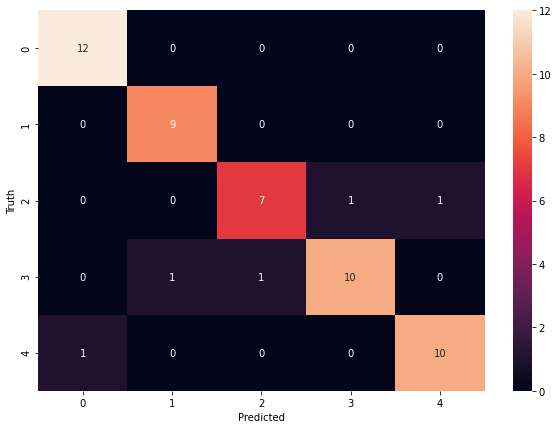

In [53]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [54]:
class_dict

{'.ipynb_checkpoints': 0,
 'AAAAAA': 1,
 'Ankur Warikoo': 2,
 'Obama': 3,
 'Sabarish': 4,
 'Suji': 5,
 'Surya': 6}

In [55]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [56]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))